## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "./Resources/Mouse_metadata.csv"
study_results_path = "./Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mergedMice_df = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")

# Display the data table for preview
mergedMice_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
groupedMice_df = mergedMice_df.groupby("Mouse ID")

miceCount_df = groupedMice_df["Mouse ID"].nunique()

miceCount = miceCount_df.sum()

print(miceCount)

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicatedMiceData_df = mergedMice_df[mergedMice_df.duplicated(["Mouse ID"], keep=False)]

duplicatedMiceData_df = duplicatedMiceData_df.drop(columns=['Drug Regimen','Sex','Age_months','Weight (g)','Tumor Volume (mm3)','Metastatic Sites'])

duplicatedMiceData_df.head()


,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicatedMiceDataAll_df = mergedMice_df[mergedMice_df.duplicated(['Mouse ID'], keep=False)]

duplicatedMiceDataAll_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
singleMouseTrial_df = mergedMice_df.drop_duplicates(subset = ["Mouse ID"], keep = False)

In [6]:
# Checking the number of mice in the clean DataFrame.
miceCountSingleTrial = singleMouseTrial_df["Mouse ID"].count()

print(miceCountSingleTrial)

12


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
miceStatsByRegimen_df = mergedMice_df.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumorMean = miceStatsByRegimen_df["Tumor Volume (mm3)"].mean()
tumorMedian = miceStatsByRegimen_df["Tumor Volume (mm3)"].median()
tumorStdev = miceStatsByRegimen_df["Tumor Volume (mm3)"].std()
tumorSEM = miceStatsByRegimen_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summaryStats_df = pd.DataFrame({"Mean": tumorMean,
                                "Median": tumorMedian,
                                "Standard Deviation": tumorStdev,
                                "Standard Error of the Mean": tumorSEM
                               })

summaryStats_df

,Mean,Median,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.322552,50.854632,6.507770,0.512884
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drugsList = []

drugsList = mergedMice_df["Drug Regimen"].unique()

for x in drugsList:
    indDrug_df = summaryStats_df.loc[x]
    print(indDrug_df)

# Using the aggregation method, produce the same summary statistics in a single line
aggTable_df = pd.DataFrame([])

aggTable_df["All Drug Regimens Averaged"] = summaryStats_df.agg({"Mean": 'mean',
                                                                 "Median": 'mean',
                                                                 "Standard Deviation": 'mean',
                                                                 "Standard Error of the Mean": 'mean'
                                                                })

aggTable_df
#not really sure I understand what is being asked here... 

Mean                          40.216745
Median                        40.673236
Standard Deviation             4.846308
Standard Error of the Mean     0.320955
Name: Ramicane, dtype: float64
Mean                          40.675741
Median                        41.557809
Standard Deviation             4.994774
Standard Error of the Mean     0.329346
Name: Capomulin, dtype: float64
Mean                          52.884795
Median                        51.820584
Standard Deviation             6.567243
Standard Error of the Mean     0.492236
Name: Infubinol, dtype: float64
Mean                          54.033581
Median                        52.288934
Standard Deviation             7.821003
Standard Error of the Mean     0.581331
Name: Placebo, dtype: float64
Mean                          52.591172
Median                        51.776157
Standard Deviation             6.268188
Standard Error of the Mean     0.469821
Name: Ceftamin, dtype: float64
Mean                          54.233149
Medi

,All Drug Regimens Averaged
Mean,50.976144
Median,49.942960
Standard Deviation,6.809671
Standard Error of the Mean,0.499641


## Bar and Pie Charts

<AxesSubplot:title={'center':'Unique Mice Tested on Each Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

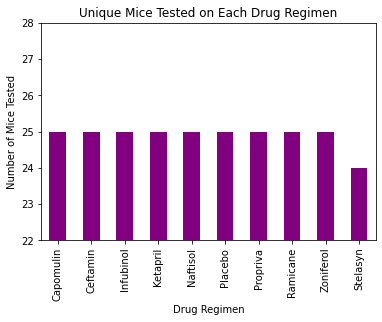

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
uniqueMiceTested_df = mouse_metadata.drop_duplicates(subset=["Mouse ID"], keep="first")

numTestsByDrug = uniqueMiceTested_df.groupby("Drug Regimen")["Mouse ID"].count()

numTestsByDrug = numTestsByDrug.sort_values(ascending = False)

testsPerDrug_plot = numTestsByDrug.plot(kind='bar', color='purple')
testsPerDrug_plot.set_xlabel("Drug Regimen")
testsPerDrug_plot.set_ylabel("Number of Mice Tested")
testsPerDrug_plot.set_title("Unique Mice Tested on Each Drug Regimen")
testsPerDrug_plot.set_ylim([22,28])
testsPerDrug_plot

Text(0.5, 1.0, 'Unique Mice Tested on Each Drug Regimen')

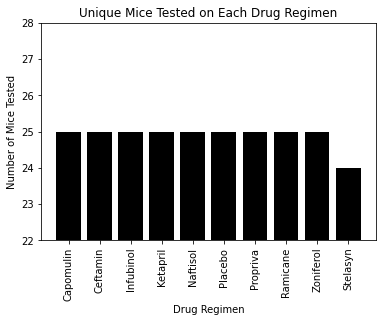

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
xAxis= numTestsByDrug.index
yAxis = numTestsByDrug.values
plt.bar(xAxis, yAxis, color="black")
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylim(22,28)
plt.ylabel("Number of Mice Tested")
plt.title("Unique Mice Tested on Each Drug Regimen")

<AxesSubplot:title={'center':'Distribution of Sex'}>

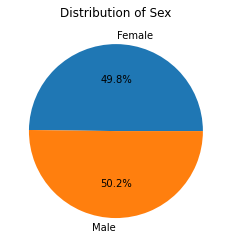

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
miceBySex_df = uniqueMiceTested_df.groupby("Sex")['Sex'].count()
miceBySex_df
miceGender_pie = miceBySex_df.plot.pie(y ='Mouse ID', title = "Distribution of Sex", autopct='%1.1f%%', legend=None)
miceGender_pie.set_ylabel("")
miceGender_pie

Text(0.5, 1.0, 'Distribution of Sex')

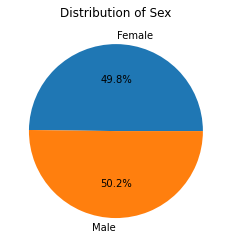

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = miceBySex_df.index
xAxis = miceBySex_df.values

plt.pie(x=xAxis, labels=labels,autopct="%1.1f%%")
plt.title("Distribution of Sex")


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
lastTrialPerMouse_df = study_results.drop_duplicates(subset=["Mouse ID"], keep="last")
lastTrialPerMouse_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mergedLastTumor_df = pd.merge(mouse_metadata, lastTrialPerMouse_df, how = "outer", on = "Mouse ID")

mergedLastTumor_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [86]:
# Put treatments into a list for for loop (and later for plot labels)
drugList = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorVolList = pd.DataFrame({"Capomulin": [],
                             "Ramicane": [],
                             "Infubinol": [],
                             "Ceftamin": []
                            })
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
     # Locate the rows which contain mice on each drug and get the tumor volumes
     # add subset 
for x in drugList:
    drugSearch_df = mergedLastTumor_df.loc[mergedLastTumor_df["Drug Regimen"] == x]
    tumorVolList[x] = drugSearch_df["Tumor Volume (mm3)"].to_list()
        
    # Determine outliers using upper and lower bounds
    quartiles = drugSearch_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    quartileUpper = quartiles[.75]
    quartileLower = quartiles[.25]
    IQR = quartileUpper - quartileLower
    boundLower = quartileLower - (1.5 * IQR)
    boundUpper = quartileUpper + (1.5 * IQR)
    
    drugSearchtemp = drugSearch_df["Tumor Volume (mm3)"]
    
    outliers = (drugSearchtemp.loc[drugSearch_df["Tumor Volume (mm3)"] >= boundUpper].count() +
               drugSearchtemp.loc[drugSearch_df["Tumor Volume (mm3)"] <= boundLower].count())
                                
    print(f'{x} outliers: {outliers}')

Capomulin outliers: 0
Ramicane outliers: 0
Infubinol outliers: 1
Ceftamin outliers: 0


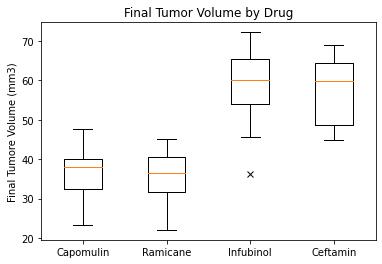

In [93]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='x')
                  
plt.boxplot(tumorVolList, flierprops=flierprops)  
                  
plt.title("Final Tumor Volume by Drug")

plt.ylabel("Final Tumore Volume (mm3)")

plt.xticks([1,2,3,4], drugList)                  

plt.show()

## Line and Scatter Plots

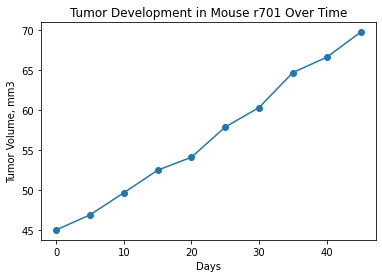

In [102]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = "r701"

data_df = mergedMice_df.loc[mergedMice_df["Mouse ID"] == mouse]

plt.plot(data_df["Timepoint"], data_df["Tumor Volume (mm3)"], marker = "o")

plt.title(f'Tumor Development in Mouse {mouse} Over Time')
plt.xlabel("Days")
plt.ylabel("Tumor Volume, mm3")

plt.show()

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
